In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime

# df_path = "Output/01_Exploration_and_Cleanup/v3_clean_data_created_percentage_changes.xlsx"
# df = pd.read_excel(df_path)

file_to_open = "data.csv"
df = pd.read_csv(file_to_open)

df.head(10)
#df.shape


,id,state,abbr,poverty,povertyMoe,age,ageMoe,income,incomeMoe,healthcare,healthcareLow,healthcareHigh,obesity,obesityLow,obesityHigh,smokes,smokesLow,smokesHigh,-0.385218228
0,1,Alabama,AL,19.3,0.5,38.6,0.2,42830,598,13.9,12.7,15.1,33.5,32.1,35.0,21.1,19.8,22.5,NaN
1,2,Alaska,AK,11.2,0.9,33.3,0.3,71583,1784,15.0,13.3,16.6,29.7,27.8,31.6,19.9,18.2,21.6,NaN
2,4,Arizona,AZ,18.2,0.4,36.9,0.1,50068,483,14.4,13.3,15.6,28.9,27.7,30.2,16.5,15.4,17.6,NaN
3,5,Arkansas,AR,18.9,0.5,37.8,0.2,41262,653,16.3,14.4,18.2,35.9,33.8,38.0,24.7,22.7,26.7,NaN
4,6,California,CA,16.4,0.2,36.0,0.1,61933,238,14.8,13.8,15.8,24.7,23.5,25.9,12.9,11.9,13.8,NaN
5,8,Colorado,CO,12.0,0.4,36.3,0.1,61303,487,12.8,11.9,13.6,21.3,20.4,22.2,15.7,14.8,16.6,NaN
6,9,Connecticut,CT,10.8,0.5,40.5,0.2,70048,828,8.7,7.6,9.7,26.3,24.8,27.7,15.4,14.2,16.7,NaN
7,10,Delaware,DE,12.5,0.9,39.6,0.3,59716,1674,8.7,7.4,9.9,30.7,28.6,32.7,19.9,17.9,21.8,NaN
8,11,Washington D.C.,DC,17.7,1.2,33.8,0.2,71648,1996,8.3,6.3,10.3,21.7,19.5,23.9,16.4,14.2,18.6,NaN
9,12,Florida,FL,16.5,0.3,41.6,0.1,47463,329,17.6,16.4,18.8,26.2,25.0,27.5,17.7,16.5,18.8,NaN


In [2]:
df.shape

(51, 19)

In [3]:
df.columns

Index(['id', 'state', 'abbr', 'poverty', 'povertyMoe', 'age', 'ageMoe',
       'income', 'incomeMoe', 'healthcare', 'healthcareLow', 'healthcareHigh',
       'obesity', 'obesityLow', 'obesityHigh', 'smokes', 'smokesLow',
       'smokesHigh', '-0.385218228'],
      dtype='object')

In [4]:
df.dtypes

id                  int64
state              object
abbr               object
poverty           float64
povertyMoe        float64
age               float64
ageMoe            float64
income              int64
incomeMoe           int64
healthcare        float64
healthcareLow     float64
healthcareHigh    float64
obesity           float64
obesityLow        float64
obesityHigh       float64
smokes            float64
smokesLow         float64
smokesHigh        float64
-0.385218228      float64
dtype: object

In [5]:
df.describe()

,id,poverty,povertyMoe,age,ageMoe,income,incomeMoe,healthcare,healthcareLow,healthcareHigh,obesity,obesityLow,obesityHigh,smokes,smokesLow,smokesHigh,-0.385218228
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,0.0
mean,28.960784,14.866667,0.531373,37.972549,0.174510,54453.607843,807.176471,12.627451,11.427451,13.833333,29.225490,27.747059,30.719608,18.460784,17.129412,19.798039,NaN
std,15.832828,3.085882,0.227588,2.447045,0.077054,9227.682697,470.320772,3.948067,3.825916,4.108073,3.416773,3.351319,3.515225,3.447612,3.300078,3.625824,NaN
min,1.000000,9.200000,0.200000,30.500000,0.100000,39680.000000,238.000000,4.600000,4.000000,5.200000,21.300000,19.500000,22.200000,9.700000,9.000000,10.300000,NaN
25%,16.500000,12.100000,0.400000,36.450000,0.100000,47695.000000,477.000000,9.950000,8.600000,11.100000,27.150000,25.650000,28.500000,16.300000,14.800000,17.500000,NaN
50%,29.000000,14.800000,0.500000,38.100000,0.200000,52622.000000,653.000000,12.500000,11.500000,13.400000,29.600000,27.800000,31.100000,18.100000,16.900000,19.000000,NaN
75%,41.500000,17.200000,0.700000,39.400000,0.200000,61112.500000,992.000000,14.900000,13.750000,16.250000,31.250000,29.900000,32.950000,20.250000,19.000000,21.950000,NaN
max,56.000000,21.500000,1.200000,44.100000,0.400000,73971.000000,1996.000000,24.900000,23.700000,26.100000,35.900000,34.200000,38.000000,26.700000,25.200000,28.100000,NaN


In [8]:
df.count()

id                51
state             51
abbr              51
poverty           51
povertyMoe        51
age               51
ageMoe            51
income            51
incomeMoe         51
healthcare        51
healthcareLow     51
healthcareHigh    51
obesity           51
obesityLow        51
obesityHigh       51
smokes            51
smokesLow         51
smokesHigh        51
-0.385218228       0
dtype: int64

In [19]:
#Define the scatter plot
def cccscatter(x_axis,y_axis,a,b,c):
    x_values = x_axis
    y_values = y_axis
    
    
    line_position_x = x_values.min()
    line_position_y = (y_values.max())*0.99
    r_position_x = x_values.min()
    r_position_y = y_values.max()*0.96
    r_squared_position_x = x_values.min()
    r_squared_position_y = y_values.max()*0.93
    
    
    plt.scatter(x_values,y_values)
    plt.title(a)
    plt.xlabel(b)
    plt.ylabel(c)    
    #Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    # y = mx + b
    regress_values = x_values * slope + intercept
    #print(regress_values)
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    
    r_value_eq = "R = " + str(round(rvalue,2))
    r_squared = rvalue * rvalue
    r_squared_value_eq = "R Sqd = " + str(round(r_squared,2))
    
    
    print(line_eq)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(line_position_x,line_position_y),fontsize=12,color="red")
    plt.annotate(r_value_eq, (r_position_x,r_position_y),fontsize=12,color="black")
    plt.annotate(r_squared_value_eq, (r_squared_position_x,r_squared_position_y),fontsize=12,color="brown")
    # Print r square value
    print(f"The r (Correlation) is: {round(rvalue,2)}")
    # Show plot
    plt.savefig("Correlation_Analysis" + a + ".png")
    plt.show()



In [140]:
#==================================================
# POVERTY vs OBESITY
#==================================================


y = 0.51x +21.61
The r (Correlation) is: 0.46


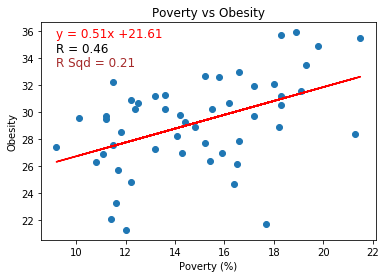

In [26]:
# Identify the columns to be plotted
poverty_df = df["poverty"]
obesity_df = df["obesity"]

# Define x and y variables
x = poverty_df
y = obesity_df


# pass the variables to the scatter function
cccscatter(x,y,"Poverty vs Obesity","Poverty (%)","Obesity")


            

In [ ]:
#==================================================
# POVERTY vs SMOKING
#==================================================

y = 0.58x +9.81
The r (Correlation) is: 0.52


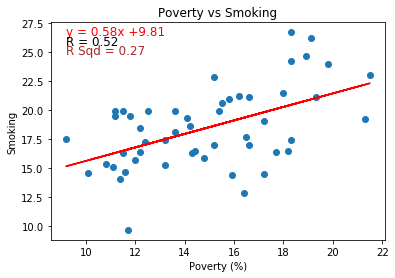

In [27]:
# Identify the columns to be plotted
poverty_df = df["poverty"]
smokes_df = df["smokes"]

# Define x and y variables
x = poverty_df
y = smokes_df


# pass the variables to the scatter function
cccscatter(x,y,"Poverty vs Smoking","Poverty (%)","Smoking")


In [ ]:
#==================================================
# POVERTY vs HEALTHCARE
#==================================================

y = 0.67x +2.65
The r (Correlation) is: 0.52


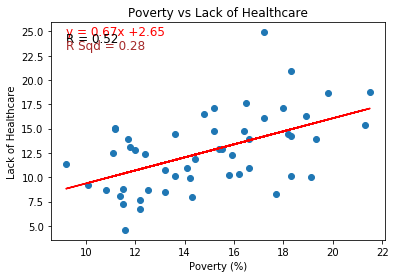

In [28]:
# Identify the columns to be plotted
poverty_df = df["poverty"]
healthcare_df = df["healthcare"]

# Define x and y variables
x = poverty_df
y = healthcare_df


# pass the variables to the scatter function
cccscatter(x,y,"Poverty vs Lack of Healthcare","Poverty (%)","Healthcare")


In [25]:
#==================================================
# AGE vs OBESITY
#==================================================

y = -0.01x +29.63
The r (Correlation) is: -0.01


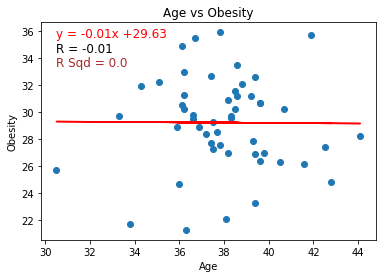

In [29]:
# Identify the columns to be plotted
age_df = df["age"]
obesity_df = df["obesity"]

# Define x and y variables
x = age_df
y = obesity_df


# pass the variables to the scatter function
cccscatter(x,y,"Age vs Obesity","Age","Obesity")


In [ ]:
#==================================================
# AGE vs SMOKING
#==================================================

y = 0.35x +5.19
The r (Correlation) is: 0.25


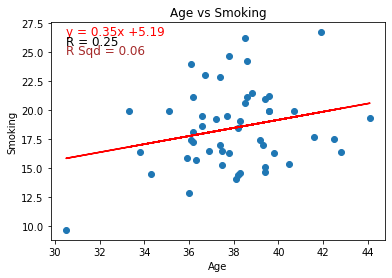

In [30]:
# Identify the columns to be plotted
age_df = df["age"]
smokes_df = df["smokes"]

# Define x and y variables
x = age_df
y = smokes_df


# pass the variables to the scatter function
cccscatter(x,y,"Age vs Smoking","Age","Smoking")


In [ ]:
#==================================================
# AGE vs HEALTHCARE
#==================================================

y = -0.62x +36.23
The r (Correlation) is: -0.39


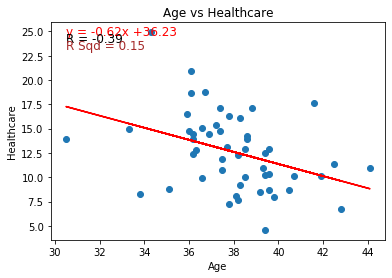

In [31]:
# Identify the columns to be plotted
age_df = df["age"]
healthcare_df = df["healthcare"]

# Define x and y variables
x = age_df
y = healthcare_df


# pass the variables to the scatter function
cccscatter(x,y,"Age vs Healthcare","Age","Healthcare")

In [ ]:
#==================================================
# HOUSEHOLD INCOME vs OBESITY
#==================================================

y = -0.0x +42.35
The r (Correlation) is: -0.65


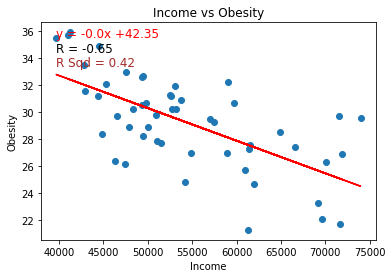

In [32]:
# Identify the columns to be plotted
income_df = df["income"]
obesity_df = df["obesity"]

# Define x and y variables
x = income_df
y = obesity_df


# pass the variables to the scatter function
cccscatter(x,y,"Income vs Obesity","Income","Obesity")

In [ ]:
#==================================================
# HOUSEHOLD INCOME vs SMOKING
#==================================================

y = -0.0x +31.89
The r (Correlation) is: -0.66


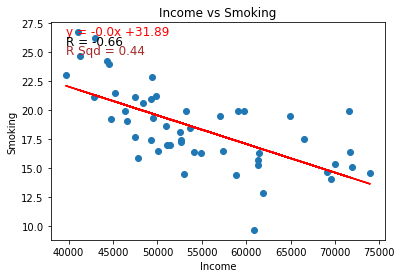

In [33]:
# Identify the columns to be plotted
income_df = df["income"]
smokes_df = df["smokes"]

# Define x and y variables
x = income_df
y = smokes_df


# pass the variables to the scatter function
cccscatter(x,y,"Income vs Smoking","Income","Smoking")

In [ ]:
#==================================================
# HOUSEHOLD INCOME vs HEALTHCARE
#==================================================

y = -0.0x +22.74
The r (Correlation) is: -0.43


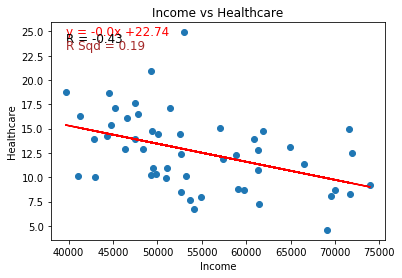

In [34]:
# Identify the columns to be plotted
income_df = df["income"]
healthcare_df = df["healthcare"]

# Define x and y variables
x = income_df
y = healthcare_df


# pass the variables to the scatter function
cccscatter(x,y,"Income vs Healthcare","Income","Healthcare")